# Normalizing exponentially distributed data

In [164]:
# Algos
import numpy as np
from scipy import stats

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

First, let's generate a data set.

<AxesSubplot:>

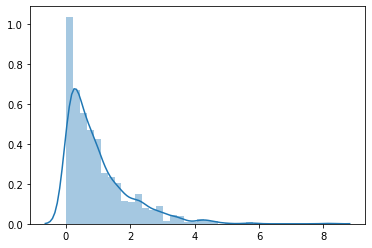

In [165]:
np.random.seed(42)
data = np.random.exponential(size = 1000)
sns.distplot(data, hist=True, kde=True, label="Skewed data")

Here's a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/) to illustrate that this data isn't close to normally distributed. (Normally distributed data would be close to the 45 degree line.)

'# suppress duplicate plot'

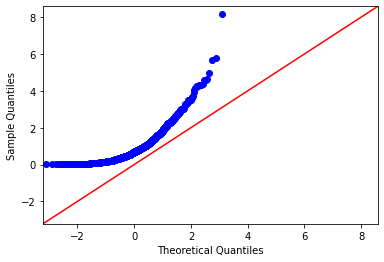

In [166]:
sm.qqplot(data, line='45')
; # suppress duplicate plot

Here's a skewness test (H0: skewness matches normal distribution), which is also a common way to test for normality. (We typically want to see the skewness test statistic between -0.80 and 0.80, with values closer to 0.0 being better.)

In [167]:
stats.skewtest(data)

SkewtestResult(statistic=16.683721393214153, pvalue=1.721524506134487e-62)

We could do other tests too, like checking kurtosis, or running inferential tests like Kolmogorov-Smirnov or Shapiro-Wilk's W test. But a Q-Q plot and skewness test will be good enough for now.

Now we'll try a series of transformations to see how they behave on this data set.

## Log transform

<AxesSubplot:>

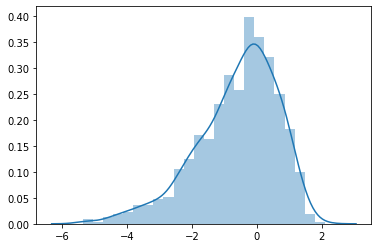

In [168]:
log_data = np.log(data)
sns.distplot(log_data, hist=True, kde=True, label="Log transformed data")

'# suppress duplicate plot'

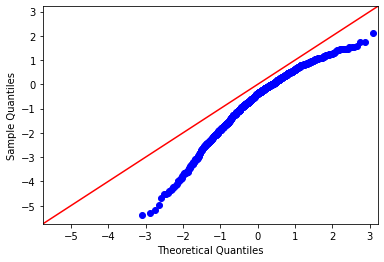

In [169]:
sm.qqplot(log_data, line='45')
; # suppress duplicate plot

In [170]:
stats.skewtest(log_data)

SkewtestResult(statistic=-9.519917686741717, pvalue=1.7331628824628637e-21)

## Square root transform

<AxesSubplot:>

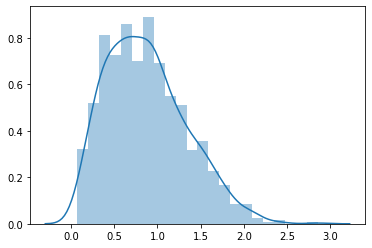

In [171]:
sqrt_data = np.sqrt(data)
sns.distplot(sqrt_data, hist=True, kde=True, label="Square root data")

'# suppress duplicate plot'

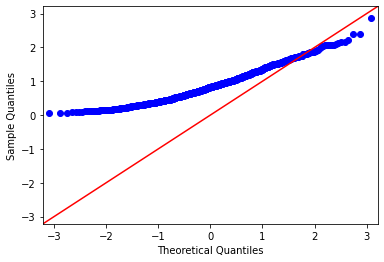

In [172]:
sm.qqplot(sqrt_data, line='45')
; # suppress duplicate plot

In [173]:
stats.skewtest(sqrt_data)

SkewtestResult(statistic=7.217158402298691, pvalue=5.308512981685476e-13)

## Inverse transform (non-zero data only)

<AxesSubplot:>

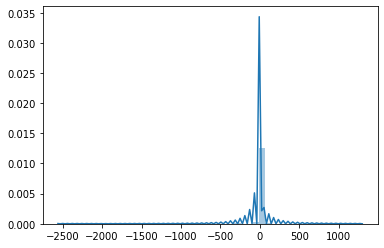

In [174]:
inv_data = np.reciprocal(1 - data)
sns.distplot(inv_data, hist=True, kde=True, label="Inverse data")

'# suppress duplicate plot'

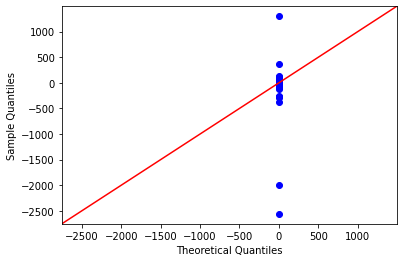

In [175]:
sm.qqplot(inv_data, line='45')
; # suppress duplicate plot

In [176]:
stats.skewtest(inv_data)

SkewtestResult(statistic=-38.78846249364161, pvalue=0.0)

## Box-Cox transform

Helps with

- non-additivity (e.g., helps with STL time series decomposition, which assumes additivity)
- non-normality
- heteroskedaticity

See [The Box-Cox transformation technique: a review](https://www.researchgate.net/publication/268412346_The_Box-Cox_Transformation_Technique_A_Review) for more information.

Box-Cox: lambda=0.24618452757119594


<AxesSubplot:>

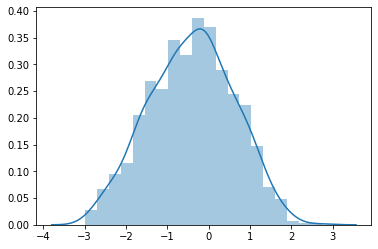

In [177]:
bc_data, bc_lambda = stats.boxcox(data)
print(f"Box-Cox: lambda={bc_lambda}")
sns.distplot(bc_data, hist=True, kde=True, label="Box-Cox data")

'# suppress duplicate plot'

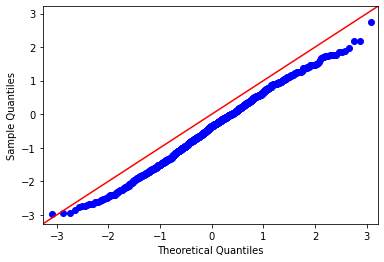

In [178]:
sm.qqplot(bc_data, line='45')
; # suppress duplicate plot

In [179]:
stats.skewtest(bc_data)

SkewtestResult(statistic=-0.7180155079899084, pvalue=0.47274772482032523)